In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris, make_classification
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 

In [5]:
X, y = make_classification(
    n_samples = 5000, 
    n_features = 50,
    n_informative = 15, 
    n_redundant = 10,
    random_state = 42, 
    shuffle = True
)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.3, 
    random_state = 42, 
    shuffle = True, 
    stratify = None
)

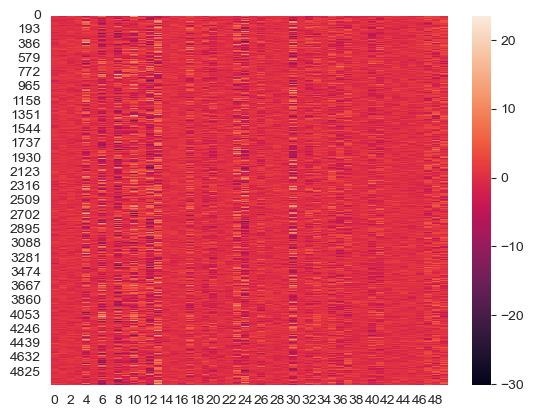

In [6]:
import seaborn as sns
sns.heatmap(X)
plt.show()

In [7]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(
        splitter = "best", 
        max_leaf_nodes = None
    ),
    n_estimators = 1000, 
    max_samples = 100, 
    bootstrap = True, 
    n_jobs = -1, 
    oob_score = True
)

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

print('Out-of-bag score on training: {}'.format(bag_clf.oob_score_))
print('Test Score: {}'.format(accuracy_score(y_test, y_pred)))

Out-of-bag score on training: 0.8305714285714285
Test Score: 0.8666666666666667


In [8]:
# Random Forest
rnd_clf = RandomForestClassifier(
    n_estimators = 1000, 
    max_leaf_nodes = 16, 
    n_jobs = -1, 
    oob_score = True
)
rnd_clf.fit(X_train, y_train) 
y_pred_rf = rnd_clf.predict(X_test)

In [9]:
print('Out-of-bag score on training: {}'.format(rnd_clf.oob_score_))
print('Test Score: {}'.format(accuracy_score(y_test, y_pred_rf)))

Out-of-bag score on training: 0.8657142857142858
Test Score: 0.89


In [10]:
# Bagging -> RF
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(
        splitter = "random", 
        max_leaf_nodes = 16
    ),
    n_estimators = 500, 
    max_samples = 1.0, 
    bootstrap = True, 
    n_jobs = -1, 
    oob_score = True
)
bag_clf.fit(X_train, y_train)
y_pred_bagging = bag_clf.predict(X_test)

In [11]:
print('Bagging Classifier')
print('Out-of-bag score on training: {}'.format(bag_clf.oob_score_))
print('Test Score: {}'.format(accuracy_score(y_test, y_pred_bagging)))

Bagging Classifier
Out-of-bag score on training: 0.8597142857142858
Test Score: 0.8833333333333333
